**Pracrice 1**

C:\Users\DER\anaconda3\lib\site-packages\seaborn\categorical.py:1326: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\DER\anaconda3\lib\site-packages\seaborn\categorical.py:1330: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


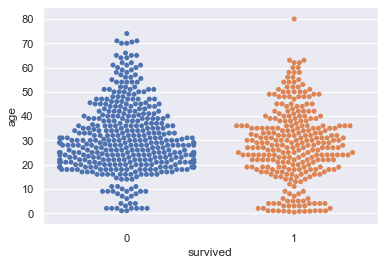

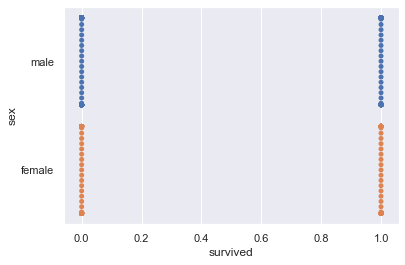

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)

# Load the example titanic dataset
titanic = sns.load_dataset("titanic")

fig, ax = plt.subplots(1, 1)
sns.swarmplot(x='survived', y= 'age', data=titanic);
fig, ax = plt.subplots(1, 1)
sns.swarmplot(x='survived', y= 'sex', data=titanic);

In [21]:
print(titanic.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


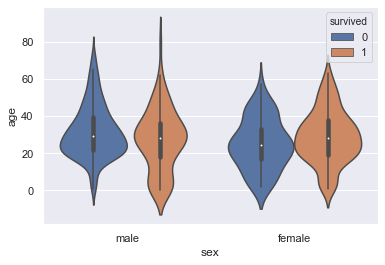

In [10]:
sns.violinplot(x="sex", y="age", hue="survived",data=titanic);

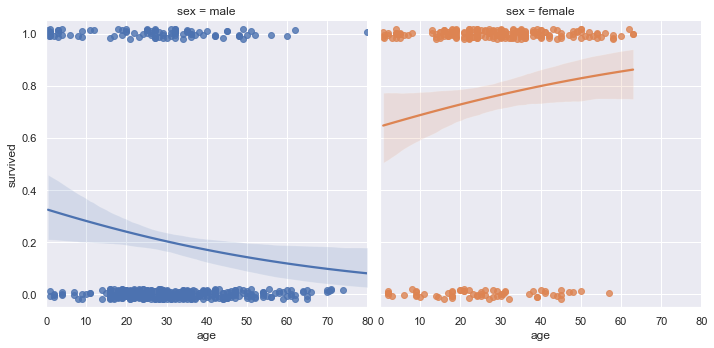

In [8]:
# Show the survival proability as a function of age and sex
# logistic设定画出逻辑回归模型
g = sns.lmplot(x="age", y="survived", col="sex", hue="sex", data=titanic,
                y_jitter=.02, logistic=True);
g.set(xlim=(0, 80), ylim=(-.05, 1.05))

**Parctice 2**

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#解决中文显示问题
from pylab import *  
mpl.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  #用来正常显示负号

mask = pd.read_csv('data\mask.csv',encoding="gbk") 

mask.head()

,名称,价格,月销量,评价数,店铺所在地,适合肤质,产地,补水保湿,美白提亮,控油祛痘,清洁毛孔,提拉紧致
0,ANGLEE,254.0,40,3133,湖南,任何肤质,中国,1,1,0,0,0
1,ANGLEE,350.0,62,876,浙江,任何肤质,中国,1,1,0,0,0
2,ANGLEE,284.9,12,16,浙江,任何肤质,中国,1,0,1,1,0
3,BF,289.0,32,175,英国,任何肤质,中国,1,0,0,0,0
4,BSR,379.9,1407,13870,安徽,任何肤质,中国,1,0,0,0,0


In [12]:
mask.loc[mask.店铺所在地 == '海外','店铺所在地']= '海外(不包括英国、新加坡)'

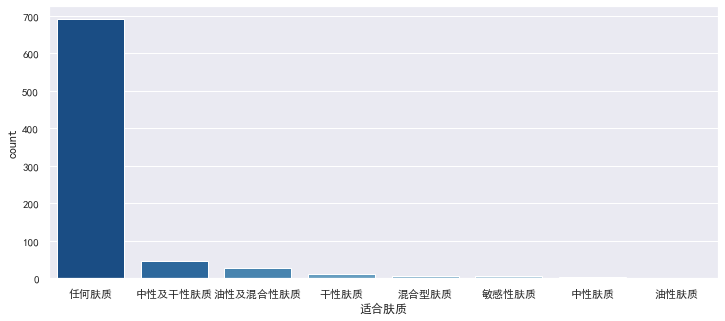

In [16]:
plt.figure(figsize=(12,5))
sns.countplot('适合肤质',data=mask,order = mask['适合肤质'].value_counts().index,palette='Blues_r')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

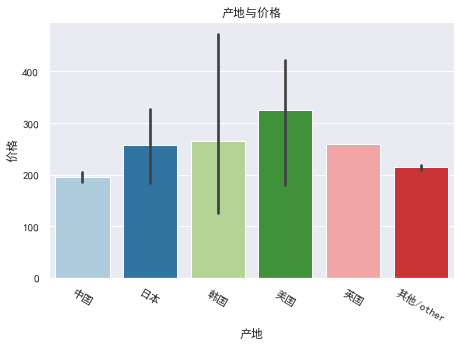

In [18]:
from numpy import median

fig=plt.figure(figsize=(16,16))
ax=fig.add_subplot(3,2,1)
g=sns.barplot(x="产地", y="价格",data=mask, palette="Paired") 
plt.title('产地与价格')
plt.xticks(rotation=-30) #旋转标签

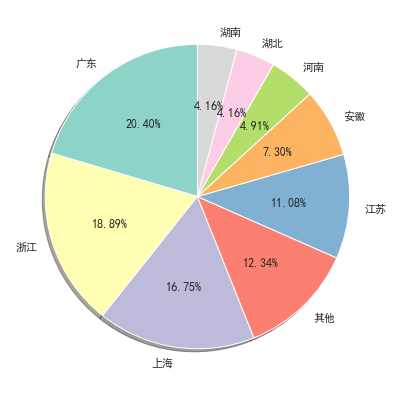

In [26]:
target_list = list(mask['店铺所在地'].value_counts()[9:].index)
mask.loc[mask['店铺所在地'].apply(lambda x: x in target_list),'店铺所在地'] = '其他'

plt.figure(figsize=(7,7))
mask['店铺所在地'].value_counts().plot.pie(autopct = '%1.2f%%',startangle=90,colors=sns.color_palette("Set3", 10),shadow=True)   
plt.ylabel('')
#plt.savefig('7店铺所在地饼图.png',dpi=200)
plt.show()

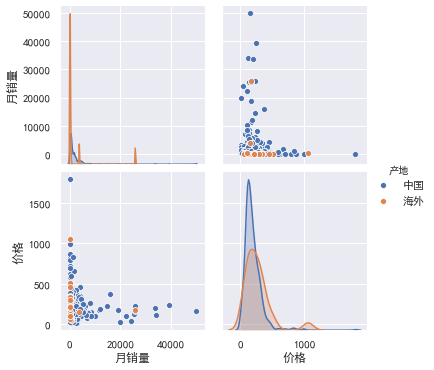

In [29]:
mask.loc[mask.产地 == '日本','产地']= '海外'
mask.loc[mask.产地 == '韩国','产地']= '海外'
mask.loc[mask.产地 == '美国','产地']= '海外'
mask.loc[mask.产地 == '英国','产地']= '海外'
mask.loc[mask.产地 == '其他/other','产地']= '海外'
sns.pairplot(mask[['月销量','价格','产地']],hue='产地')

<Figure size 216x216 with 0 Axes>

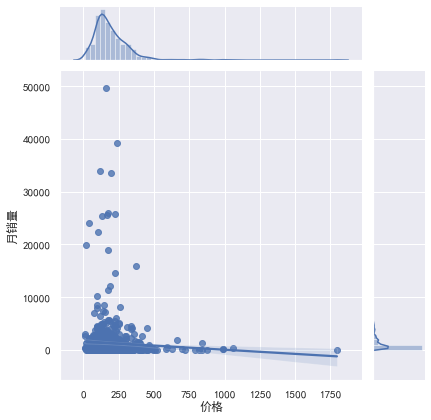

In [37]:
fig=plt.figure(figsize=(3,3))
x=mask['价格']
y=mask["月销量"]
sns.jointplot(x,y,kind = 'reg')

<Figure size 216x216 with 0 Axes>

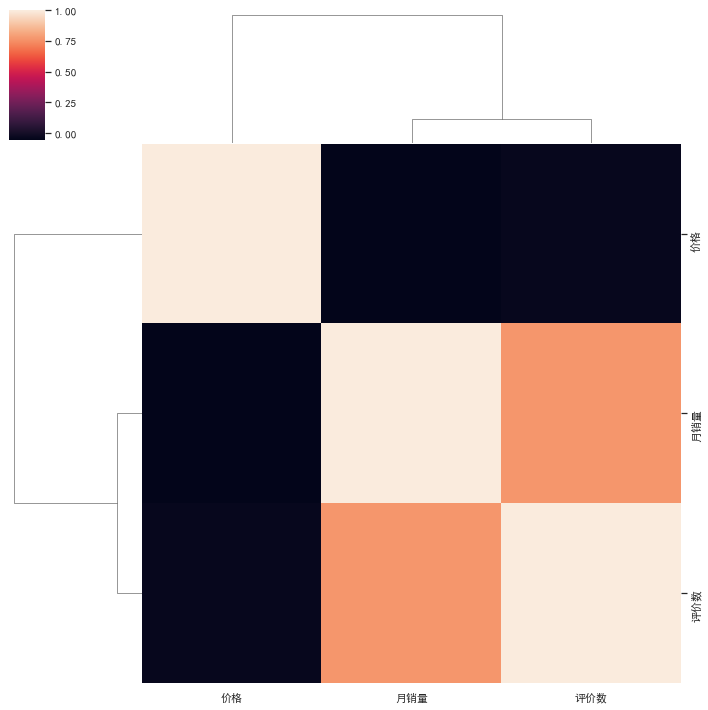

In [39]:
fig=plt.figure(figsize=(3,3))
# 分层相关性热力图
sns.clustermap(mask[['月销量','评价数','价格']].corr())